In [17]:
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


samplerate, data = wavfile.read('inputaudio.wav')
# samplerate 是取樣率
# data 是音訊

In [18]:
duration = len(data)/samplerate
# 利用資料的長度除以取樣率會是整個音訊的長度，單位 秒。
time = np.arange(0,duration,1/samplerate)
# 用 np 建立個 0 ~ duration 時間的資料，資料之間的間隔為 1/samplerate

print(data.shape)

(83600,)


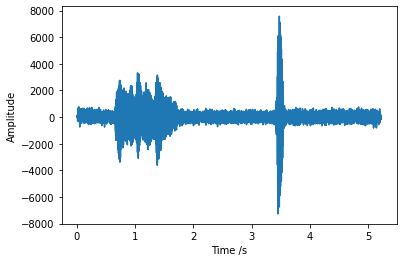

In [4]:
plt.figure() # pyplot
plt.plot(time, data)
# plt.plot(time, data,marker='o') # 開畫
plt.xlabel("Time /s")
plt.ylabel("Amplitude")

# plt.xlim(3.495,3.5)
# 限制 x 軸的顯示範圍

plt.show()

# STFT

[0.0000000e+00 7.8125000e+00 1.5625000e+01 ... 7.9843750e+03 7.9921875e+03
 8.0000000e+03]
[0.    0.032 0.064 0.096 0.128 0.16  0.192 0.224 0.256 0.288 0.32  0.352
 0.384 0.416 0.448 0.48  0.512 0.544 0.576 0.608 0.64  0.672 0.704 0.736
 0.768 0.8   0.832 0.864 0.896 0.928 0.96  0.992 1.024 1.056 1.088 1.12
 1.152 1.184 1.216 1.248 1.28  1.312 1.344 1.376 1.408 1.44  1.472 1.504
 1.536 1.568 1.6   1.632 1.664 1.696 1.728 1.76  1.792 1.824 1.856 1.888
 1.92  1.952 1.984 2.016 2.048 2.08  2.112 2.144 2.176 2.208 2.24  2.272
 2.304 2.336 2.368 2.4   2.432 2.464 2.496 2.528 2.56  2.592 2.624 2.656
 2.688 2.72  2.752 2.784 2.816 2.848 2.88  2.912 2.944 2.976 3.008 3.04
 3.072 3.104 3.136 3.168 3.2   3.232 3.264 3.296 3.328 3.36  3.392 3.424
 3.456 3.488 3.52  3.552 3.584 3.616 3.648 3.68  3.712 3.744 3.776 3.808
 3.84  3.872 3.904 3.936 3.968 4.    4.032 4.064 4.096 4.128 4.16  4.192
 4.224 4.256 4.288 4.32  4.352 4.384 4.416 4.448 4.48  4.512 4.544 4.576
 4.608 4.64  4.672 4.704 4.736 4.76

C:\Users\USER\AppData\Local\Temp/ipykernel_30896/2042181007.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=10, shading='flat')


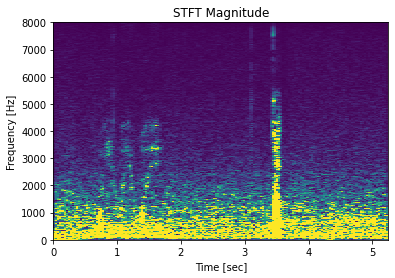

In [28]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=2048, noverlap=2048-512)
# 進行 stft 轉換， nperseg 是音窗的長度，noverlap 是音窗之間重疊的長度，單位"應該"是資料量。
# 這邊是重疊 1/2，

print(f)
print(t)
print(Zxx.shape)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=10, shading='flat')
# 劃出圖片，其中 vmin 和 vmax 就是資料的上限和下限，如果超過的話整片黃的或藍的，像下面一樣
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(0,1) # 限制x軸輸出範圍。
# plt.ylim(3000,4000) # 限制y軸輸出範圍。
plt.show()

# FFT
記得要加 abs 否則會因為虛數而輸出奇怪的圖形。

83600 83600 41800
[0.00000000e+00 1.91387560e-01 3.82775120e-01 ... 7.99942584e+03
 7.99961722e+03 7.99980861e+03]


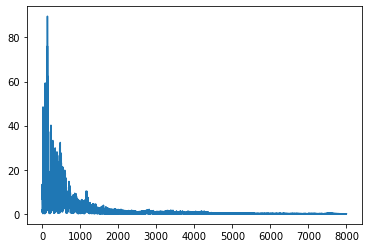

In [7]:
y = fft(data)
x = fftfreq(len(data),1/samplerate)[:(len(data)//2)]
x2 = fftfreq(400,1/samplerate)[:(len(data)//2)]
print(len(data),len(y),len(x))
print(x)
plt.plot(x,2/len(data) * np.abs(y[0:len(data)//2]))
# plt.xlim(1000,1010)
# plt.ylim(0,100)
plt.show()

# 建立聲音

48000


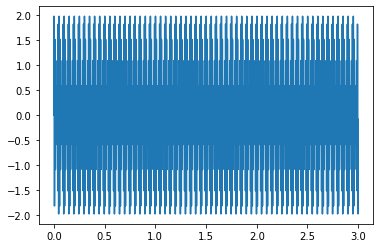

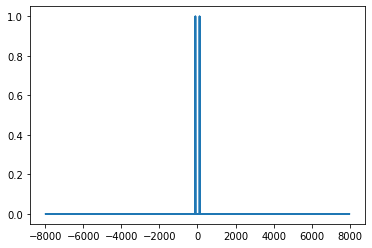

In [12]:
# 正弦波
sr = 16000
x = np.arange(0,3,1/sr)
y = 1 * np.sin(100*2*np.pi*x) + np.sin(120*2*np.pi*x) #+ np.sin(140*2*np.pi*x)

fx = fftfreq(len(x),1/sr)
fy = fft(y)
plt.figure()
plt.plot(x,y)

plt.figure()
# plt.plot(fx,2/len(x) * np.abs(fy))
plt.plot(fx,2/len(x) * np.abs(fy))
# plt.xlim(0,10)
print(len(x))

# 輸出 & 聽

In [9]:
import winsound
import wavio
#filename = "inputaudio.wav"
# winsound.PlaySound(filename, winsound.SND_FILENAME)
y = np.array(y* (2**14), np.int16)

wavio.write("mytune.wav",y,16000)

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [4]:
filename = "mytune.wav"
# winsound.PlaySound(filename, winsound.SND_FILENAME)

In [7]:
samplerate, data = wavfile.read(filename)
print(samplerate)

duration = len(data)/samplerate
# 利用資料的長度除以取樣率會是整個音訊的長度，單位 秒。
time = np.arange(0,duration,1/samplerate)
# 用 np 建立個 0 ~ duration 時間的資料，資料之間的間隔為 1/samplerate

16000


48000


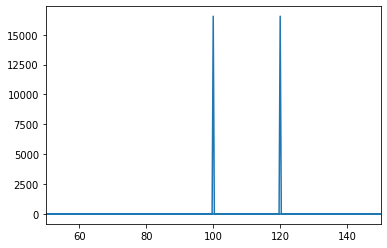

In [13]:
y = fft(data)
x = fftfreq(len(data),1/samplerate)
print(len(data))
plt.plot(x,2/len(data) * np.abs(y))
plt.xlim(50,150)
# plt.ylim(0,100)
plt.show()